# EDA & Feature Engineering for "Give me Credit" Kaggle dataset

## Exploratory Data Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Visual consistency
sns.set(style='whitegrid', palette="Paired", font_scale=1.1)

In [30]:
# Loading the cleaned data
df = pd.read_csv("cleaned_credit_data_raw.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149399 entries, 0 to 149398
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149399 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149399 non-null  float64
 2   age                                   149399 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149399 non-null  int64  
 4   DebtRatio                             149399 non-null  float64
 5   MonthlyIncome                         149399 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149399 non-null  int64  
 7   NumberOfTimes90DaysLate               149399 non-null  int64  
 8   NumberRealEstateLoansOrLines          149399 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149399 non-null  int64  
 10  NumberOfDependents                    149399 non-null  float64
dtype

In [31]:
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,5400.0,2,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


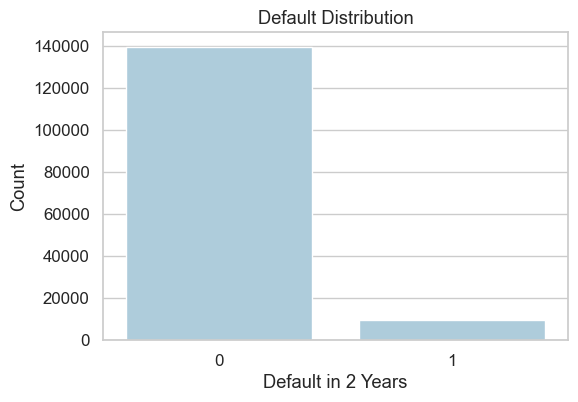

In [32]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='SeriousDlqin2yrs',data=df)
plt.title("Default Distribution")
plt.xlabel("Default in 2 Years")
plt.ylabel("Count")
plt.show()

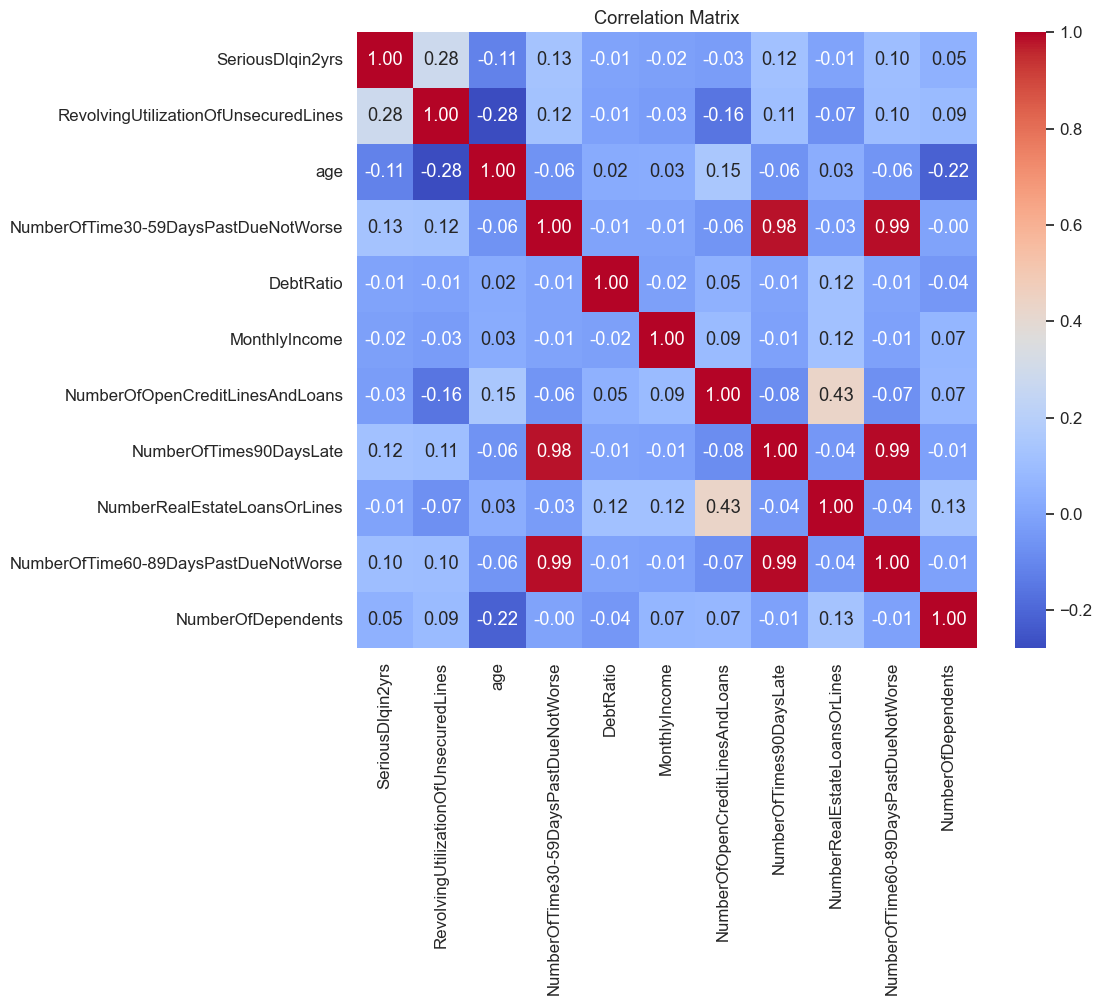

In [33]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

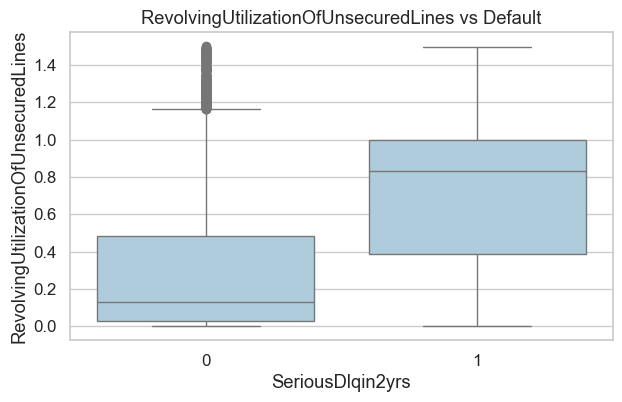

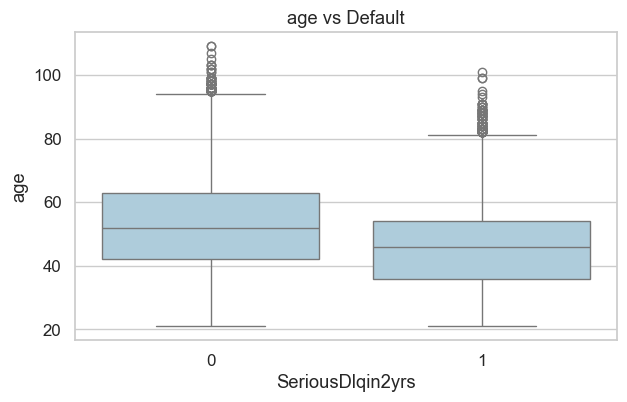

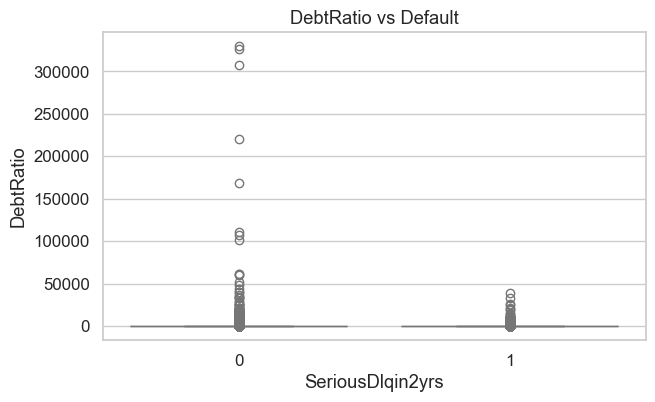

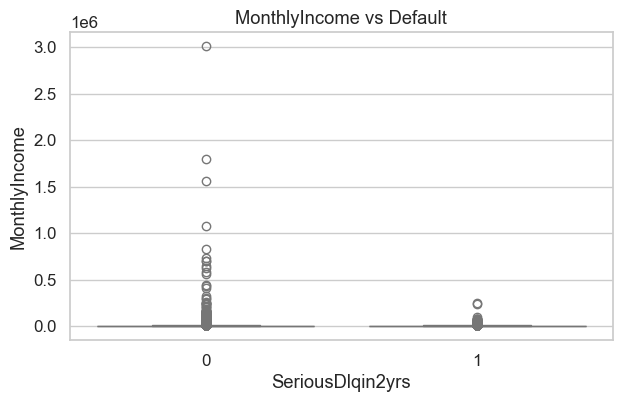

In [34]:
# Boxplots: defaults vs. key numerical features
features_to_plot = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome']

for feature in features_to_plot:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='SeriousDlqin2yrs',y=feature, data=df)
    plt.title(f"{feature} vs Default")
    plt.show()

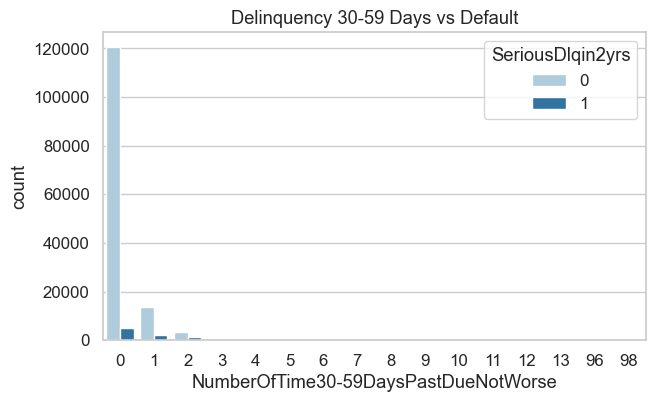

In [35]:
# Countplot: Number of 30-59 Days Past Due
plt.figure(figsize=(7,4))
sns.countplot(x='NumberOfTime30-59DaysPastDueNotWorse',hue='SeriousDlqin2yrs',data=df)
plt.title("Delinquency 30-59 Days vs Default")
plt.show()

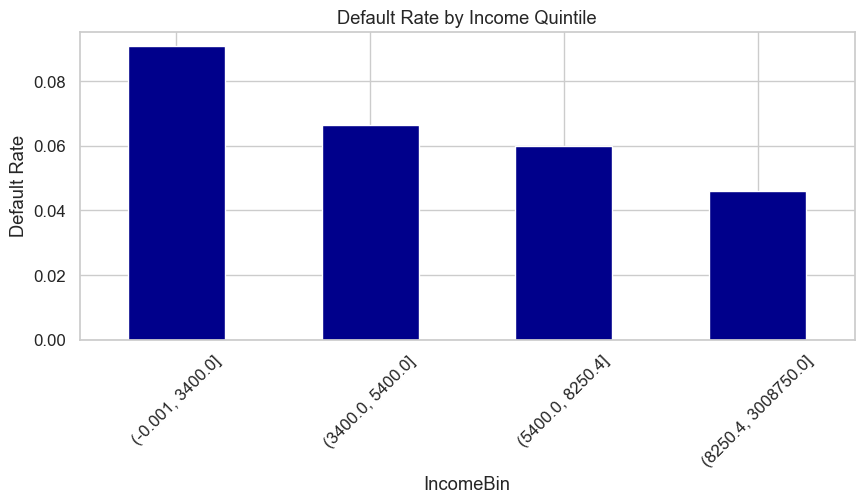

In [36]:
# Grouped bar chart: Default rate by income bin
df['IncomeBin'] = pd.qcut(df['MonthlyIncome'],q=5,duplicates='drop')
default_by_income = df.groupby('IncomeBin')['SeriousDlqin2yrs'].mean()

default_by_income.plot(kind='bar',figsize=(10,4),color='darkblue')
plt.ylabel("Default Rate")
plt.title("Default Rate by Income Quintile")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Feature Engineering

**5 Features will be created:**
- **Debt-to-Income Ratio (DTI):** Helps measure repayment capacity
- **Credit Activity Score:** Sum of all delinquency flags (proxy for credit behavior)
- **Late Payment Flags:** Binary indicators if borrower was ever late (30+, 60+, 90+)
- **Age Band & Income Band:** Binned versions for segmenting
- **Log Monthly Income:** Log-transform to normalize skewed distribution

In [37]:
# DTI = DebtRatio * MonthlyIncome
df['DTI'] = df['DebtRatio'] * df['MonthlyIncome']

In [38]:
# Credit Activity Score = sum of past due occrency
df['TotalPastDue'] = (
    df['NumberOfTime30-59DaysPastDueNotWorse'] +
    df['NumberOfTime60-89DaysPastDueNotWorse']+
    df['NumberOfTimes90DaysLate']
)

In [ ]:
# Late Payment Flags (binary)
df['Any30_59Late'] = (df['NumberOfTime30-59DaysPastDueNotWorse']>0).astype(int)
df['Any60_89Late'] = (df['NumberOfTime60-89DaysPastDueNotWorse']>0).astype(int)
df['Any90Late'] = (df['NumberOfTimes90DaysLate']>0).astype(int)

In [42]:
# Age Bins
df['AgeGroup'] = pd.cut(df['age'],bins=[17,29,39,49,59,69,120],labels=['<30','<30s','40s','50s','60s','70+'])

In [43]:
# Income Bins
df['IncomeGroup'] = pd.qcut(df['MonthlyIncome'],q=5, duplicates='drop')

In [44]:
# Log Monthly Income (to reduce skewness)
df['LogIncome'] = np.log1p(df['MonthlyIncome'])

In [46]:
# Preview
df[['SeriousDlqin2yrs','DTI','TotalPastDue','Any90Late','AgeGroup','LogIncome']].head(10)

,SeriousDlqin2yrs,DTI,TotalPastDue,Any90Late,AgeGroup,LogIncome
0,1,7.323197e+03,2,0,40s,9.118335
1,0,3.168781e+02,0,0,40s,7.863651
2,0,2.589149e+02,2,1,<30s,8.020599
3,0,1.189640e+02,0,0,<30s,8.101981
4,0,1.584975e+03,1,0,40s,11.060196
5,0,1.314624e+03,0,0,70+,8.160804
6,0,3.083400e+07,0,0,50s,8.594339
7,0,7.347901e+02,0,0,<30s,8.160804
8,0,2.484000e+05,0,0,<30,8.594339
9,0,1.435939e+04,0,0,50s,10.072597


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149399 entries, 0 to 149398
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   SeriousDlqin2yrs                      149399 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  149399 non-null  float64 
 2   age                                   149399 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  149399 non-null  int64   
 4   DebtRatio                             149399 non-null  float64 
 5   MonthlyIncome                         149399 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       149399 non-null  int64   
 7   NumberOfTimes90DaysLate               149399 non-null  int64   
 8   NumberRealEstateLoansOrLines          149399 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  149399 non-null  int64   
 10  NumberOfDependents                    149399 non-null  f

In [48]:
# Exporting engineered raw version
df.to_csv("engineered_credit_data_raw.csv", index=False)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# Separating target and features
target = df['SeriousDlqin2yrs']
features = df.drop(columns=['SeriousDlqin2yrs'])

In [54]:
# Separating numeric and non-numeric features
features_numeric = features.select_dtypes(include=['float64','int64'])
features_non_numeric = features.select_dtypes(exclude=['float64','int64']).reset_index(drop=True)

In [55]:
# Applying scaling to numeric features
scaler =StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_numeric),columns=features_numeric.columns)

In [56]:
#Recombining scaled numeric features + categorical features + target
df_scaled = pd.concat([target.reset_index(drop=True),features_scaled,features_non_numeric],axis=1)

In [57]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149399 entries, 0 to 149398
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   SeriousDlqin2yrs                      149399 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  149399 non-null  float64 
 2   age                                   149399 non-null  float64 
 3   NumberOfTime30-59DaysPastDueNotWorse  149399 non-null  float64 
 4   DebtRatio                             149399 non-null  float64 
 5   MonthlyIncome                         149399 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       149399 non-null  float64 
 7   NumberOfTimes90DaysLate               149399 non-null  float64 
 8   NumberRealEstateLoansOrLines          149399 non-null  float64 
 9   NumberOfTime60-89DaysPastDueNotWorse  149399 non-null  float64 
 10  NumberOfDependents                    149399 non-null  f

In [58]:
df_scaled.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DTI,TotalPastDue,Any30_59Late,Any60_89Late,Any90Late,LogIncome,IncomeBin,AgeGroup,IncomeGroup
0,1,1.274394,-0.495397,0.376030,-0.172596,0.209234,0.881107,-0.063240,4.407022,-0.057627,1.141014,-0.164625,0.086113,2.298207,-0.229384,-0.240441,0.560889,"(8250.4, 3008750.0]",40s,"(8250.4, 3008750.0]"
1,0,1.817873,-0.833868,-0.100083,-0.172930,-0.295742,-0.867216,-0.063240,-0.901744,-0.057627,0.237536,-0.165271,-0.074013,-0.435122,-0.229384,-0.240441,-0.487776,"(-0.001, 3400.0]",40s,"(-0.001, 3400.0]"
2,0,0.967278,-0.969256,0.137974,-0.172948,-0.261509,-1.255732,0.176209,-0.901744,-0.057627,-0.665941,-0.165277,0.086113,2.298207,-0.229384,4.159025,-0.356599,"(-0.001, 3400.0]",<30s,"(-0.001, 3400.0]"
3,0,-0.240088,-1.510810,-0.100083,-0.172972,-0.241527,-0.672958,-0.063240,-0.901744,-0.057627,-0.665941,-0.165289,-0.074013,-0.435122,-0.229384,-0.240441,-0.288580,"(-0.001, 3400.0]",<30s,"(-0.001, 3400.0]"
4,0,1.675871,-0.224620,0.137974,-0.172977,4.427801,-0.284442,-0.063240,-0.016950,-0.057627,-0.665941,-0.165154,0.006050,2.298207,-0.229384,-0.240441,2.183898,"(8250.4, 3008750.0]",40s,"(8250.4, 3008750.0]"
5,0,-0.298785,1.467734,-0.100083,-0.172805,-0.226037,-1.061474,-0.063240,-0.016950,-0.057627,0.237536,-0.165179,-0.074013,-0.435122,-0.229384,-0.240441,-0.239416,"(3400.0, 5400.0]",70+,"(3400.0, 5400.0]"
6,0,-0.035605,0.316933,-0.100083,2.625570,-0.078881,-0.090184,-0.063240,1.752639,-0.057627,-0.665941,2.678372,-0.074013,-0.435122,-0.229384,-0.240441,0.122934,"(3400.0, 5400.0]",50s,"(3400.0, 5400.0]"
7,0,1.241212,-0.901562,-0.100083,-0.172887,-0.226037,-0.090184,-0.063240,-0.901744,-0.057627,-0.665941,-0.165233,-0.074013,-0.435122,-0.229384,-0.240441,-0.239416,"(3400.0, 5400.0]",<30s,"(3400.0, 5400.0]"
8,0,-0.572561,-1.713892,-0.100083,-0.150444,-0.078881,-1.255732,-0.063240,-0.901744,-0.057627,-0.665941,-0.142392,-0.074013,-0.435122,-0.229384,-0.240441,0.122934,"(3400.0, 5400.0]",<30,"(3400.0, 5400.0]"
9,0,-0.367094,0.316933,-0.100083,-0.172692,1.337221,0.104074,-0.063240,2.637433,-0.057627,1.141014,-0.163976,-0.074013,-0.435122,-0.229384,-0.240441,1.358463,"(8250.4, 3008750.0]",50s,"(8250.4, 3008750.0]"


In [59]:
# Exporting to new CSV
df_scaled.to_csv("engineered_credit_data_scaled.csv",index=False)